## Initial Import and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Datasets/Combined_Dataset.csv')
df.head(10)

,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
0,CO,Healthcare Provider,26609.0,Hacking/IT Incident,Email,No
1,WI,Healthcare Provider,907.0,Unauthorized Access/Disclosure,Email,No
2,NH,Healthcare Provider,34878.0,Hacking/IT Incident,Network Server,No
3,CA,Healthcare Provider,500.0,Theft,Paper/Films,No
4,OH,Healthcare Provider,2716.0,Hacking/IT Incident,"Laptop, Network Server",No
5,AZ,Healthcare Provider,717.0,Loss,Paper/Films,No
6,AR,Healthcare Provider,2067.0,Hacking/IT Incident,Network Server,Yes
7,WA,Business Associate,207000.0,Hacking/IT Incident,Network Server,Yes
8,MI,Healthcare Provider,28658.0,Hacking/IT Incident,Network Server,No
9,PA,Healthcare Provider,11135.0,Unauthorized Access/Disclosure,Other,No


In [2]:
df.shape
# Dataset has 4223 rows and 6 columns

(4223, 6)

In [3]:
df.nunique()

State                                 52
Covered Entity Type                    4
Individuals Affected                1768
Type of Breach                        43
Location of Breached Information      98
Business Associate Present             2
dtype: int64

In [4]:
df.isnull().sum()

State                                 16
Covered Entity Type                 1140
Individuals Affected                  60
Type of Breach                        46
Location of Breached Information      43
Business Associate Present             0
dtype: int64

In [5]:
# Dropping nan elements from state column
df.dropna(subset = ['State'], inplace = True)
df.dropna(subset = ['Individuals Affected'], inplace = True)
df.dropna(subset = ['Type of Breach'], inplace = True)
df.dropna(subset = ['Location of Breached Information'], inplace = True)
df.isnull().sum()

State                                  0
Covered Entity Type                 1096
Individuals Affected                   0
Type of Breach                         0
Location of Breached Information       0
Business Associate Present             0
dtype: int64

In [6]:
df = df.fillna(df.mean())

## Univariate Analysis

In [7]:
#Separating categorical and continuous features
cat=[i for i in df.columns if df[i].nunique()<10 ]
cont=[i for i in df.columns if df[i].nunique()>10]

CA    419
TX    341
NY    284
FL    268
IL    184
PA    170
OH    152
IN    127
GA    124
MA    124
MI    113
NC    111
MN    105
TN    101
MO     97
WA     87
MD     84
KY     82
VA     81
AZ     79
CO     78
CT     73
NJ     72
AR     57
WI     56
PR     54
OR     53
SC     51
AL     45
IA     42
NM     41
LA     39
UT     37
NE     31
OK     29
KS     24
DC     23
NV     23
DE     21
WV     19
MT     17
AK     17
RI     17
MS     16
WY     14
ME     13
NH     12
ID     11
ND     10
HI      6
VT      5
SD      5
Name: State, dtype: int64

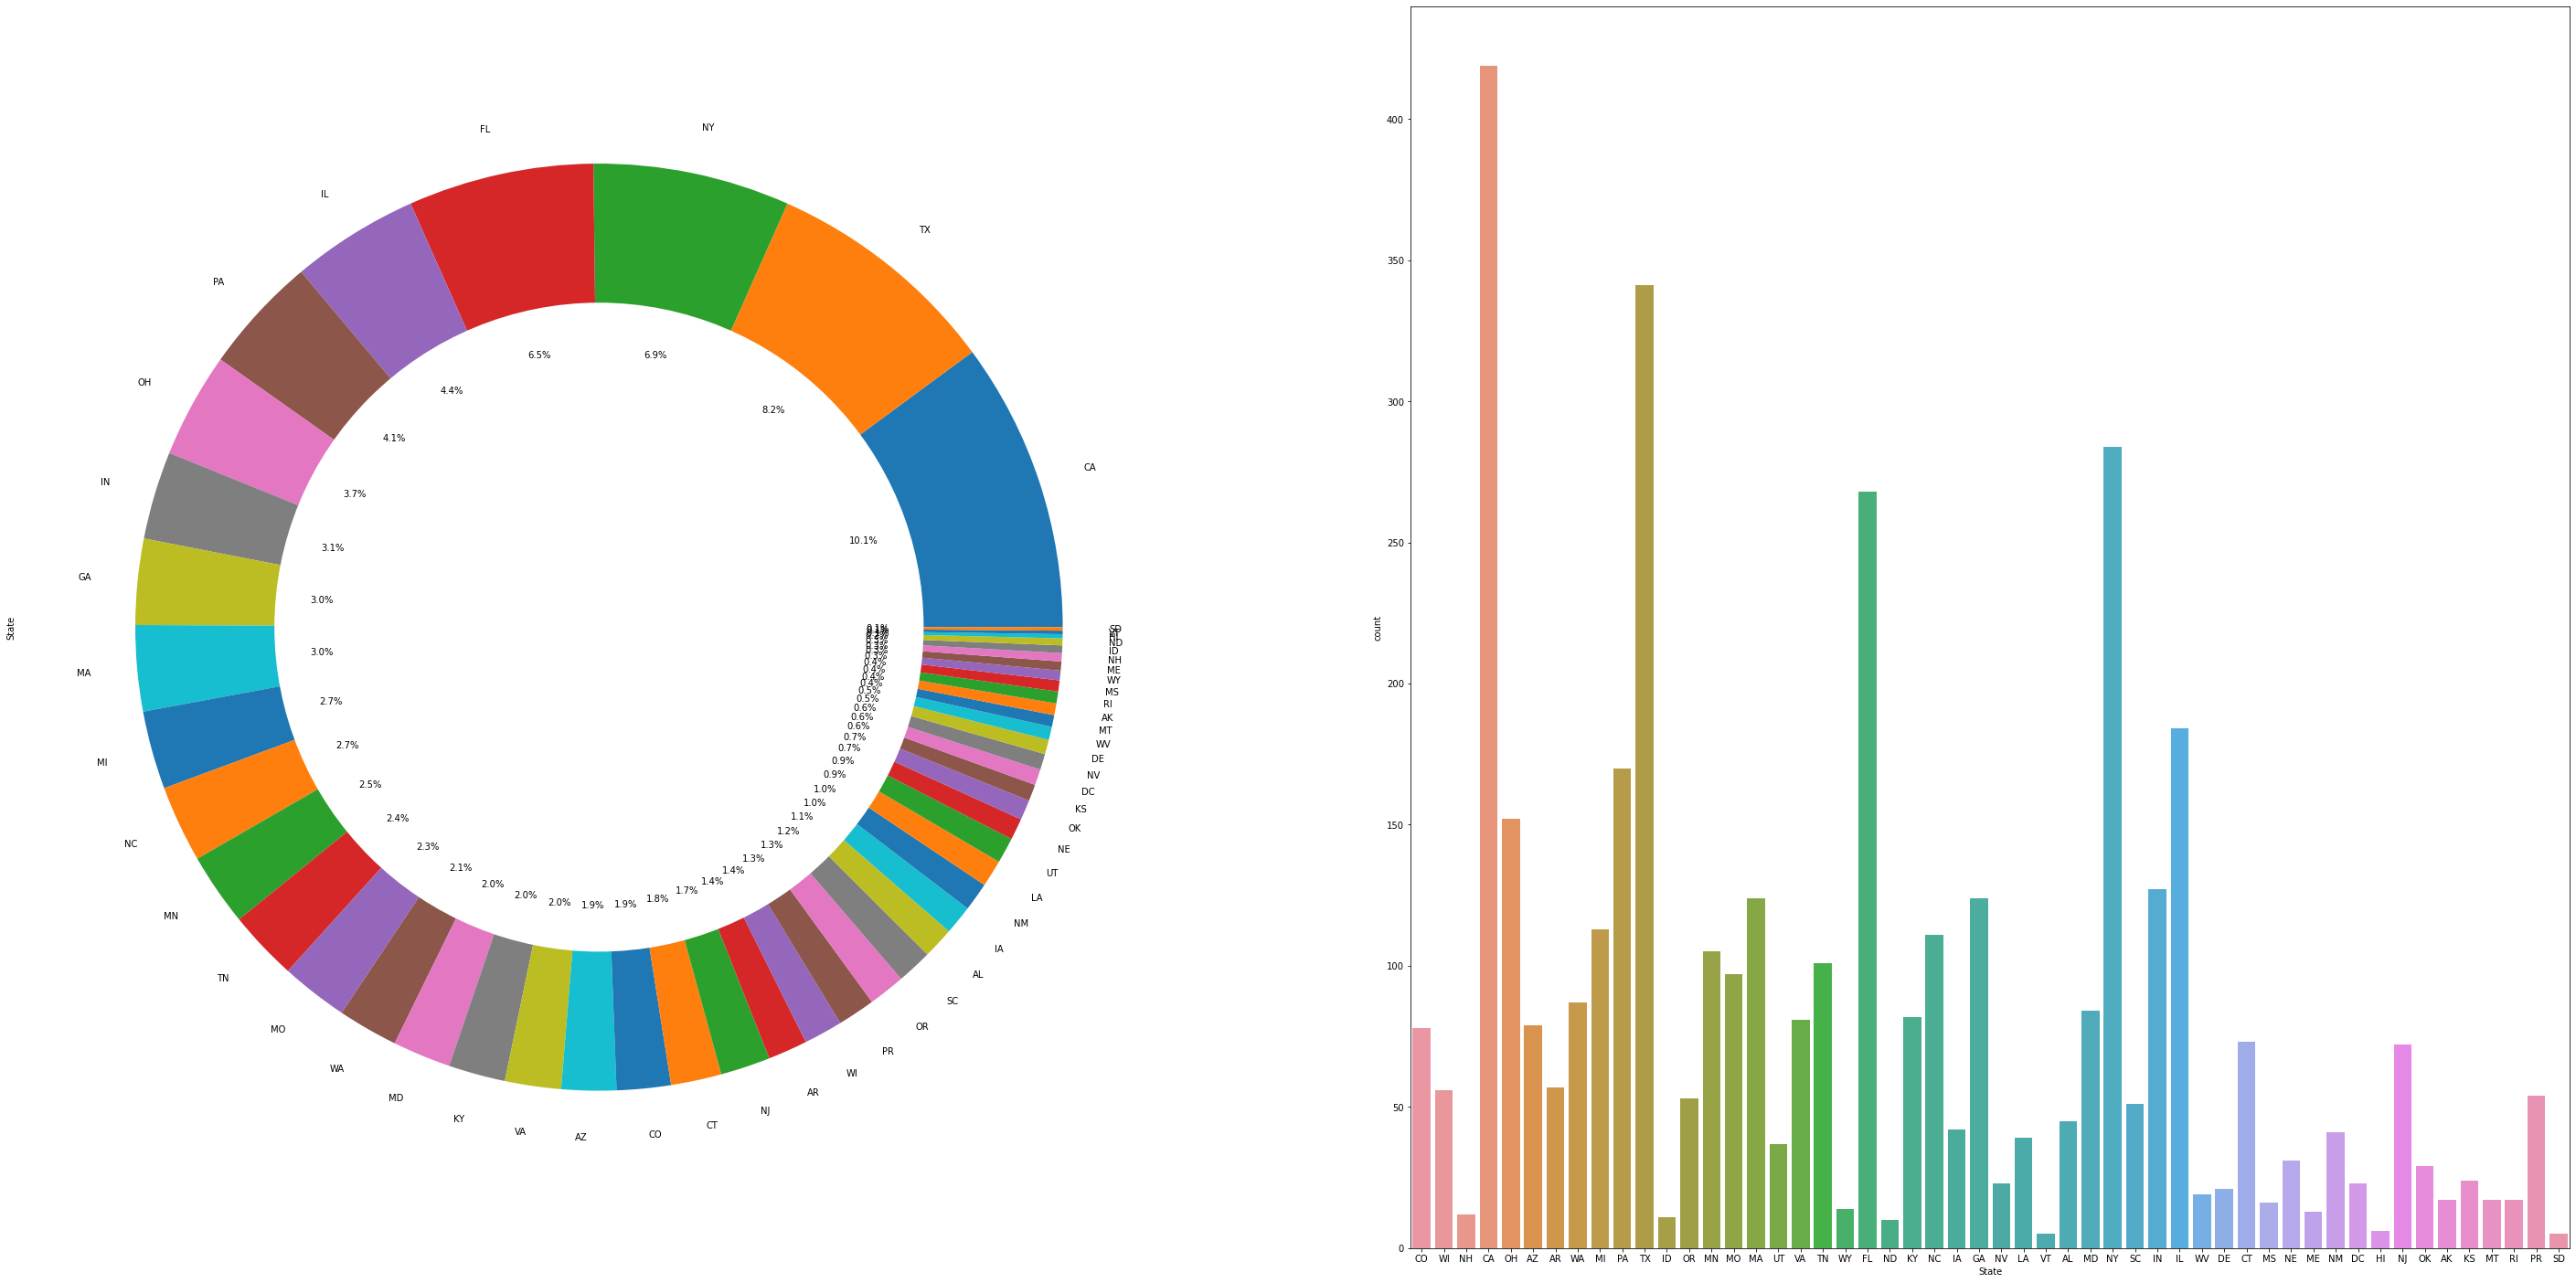

In [8]:
plt.figure(figsize=(50,25))
plt.subplot(1,2,1)
df['State'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='State',data=df)
df['State'].value_counts()

Healthcare Provider          2279
Business Associate            430
Health Plan                   333
Healthcare Clearing House       6
Name: Covered Entity Type, dtype: int64

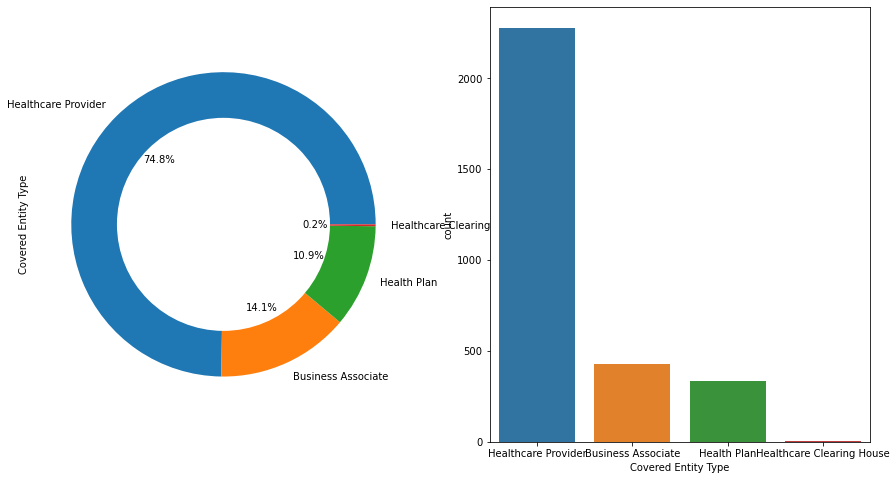

In [9]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Covered Entity Type'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Covered Entity Type',data=df)
df['Covered Entity Type'].value_counts()

Hacking/IT Incident                                           1318
Theft                                                         1292
Unauthorized Access/Disclosure                                 817
Loss                                                           238
Other                                                          168
Improper Disposal                                              117
Theft, Unauthorized Access/Disclosure                           50
Unknown                                                         19
Theft, Loss                                                     15
Loss, Theft                                                     14
Unauthorized Access/Disclosure, Hacking/IT Incident              9
Loss, Unauthorized Access/Disclosure                             8
Unauthorized Access/Disclosure, Other                            8
Hacking/IT Incident, Unauthorized Access/Disclosure              8
Other, Unauthorized Access/Disclosure                         

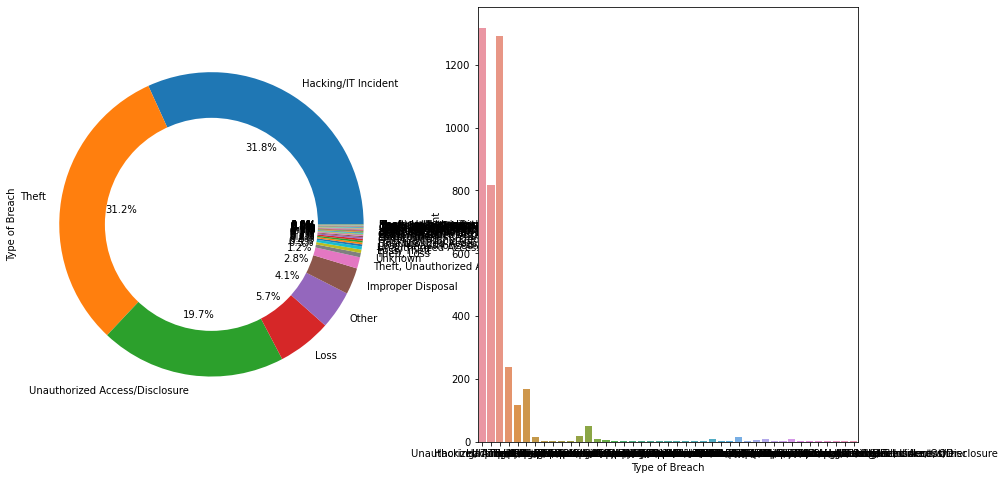

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Type of Breach'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Type of Breach',data=df)
df['Type of Breach'].value_counts()

Network Server                                                                                                         791
Email                                                                                                                  677
Laptop                                                                                                                 514
Paper/Films                                                                                                            505
Other                                                                                                                  329
                                                                                                                      ... 
Desktop Computer, Laptop, Network Server                                                                                 1
Desktop Computer, Electronic Medical Record, Email, Laptop, Network Server, Other, Other Portable Electronic Device      1
Email, Network S

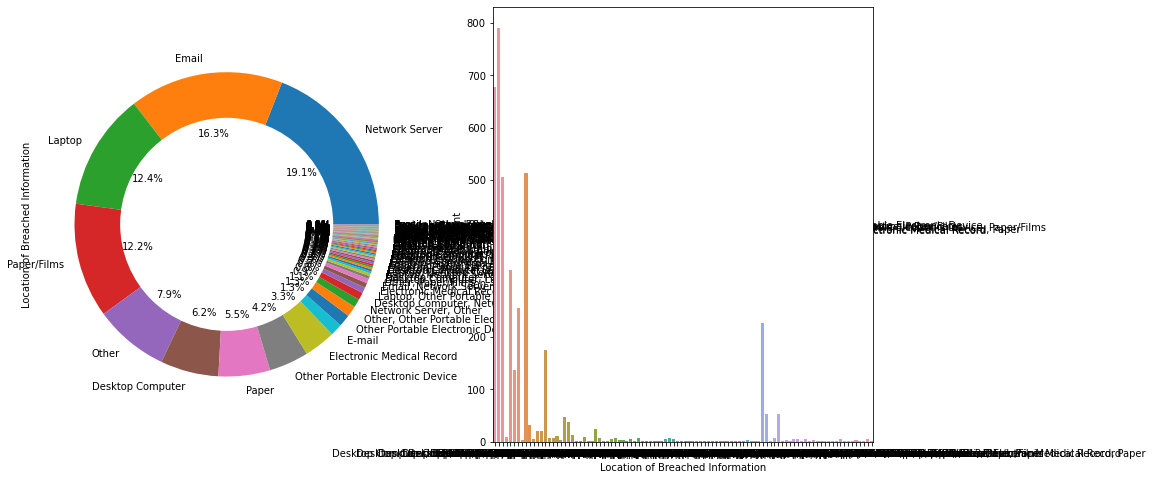

In [11]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Location of Breached Information'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Location of Breached Information',data=df)
df['Location of Breached Information'].value_counts()

No     3124
Yes    1020
Name: Business Associate Present, dtype: int64

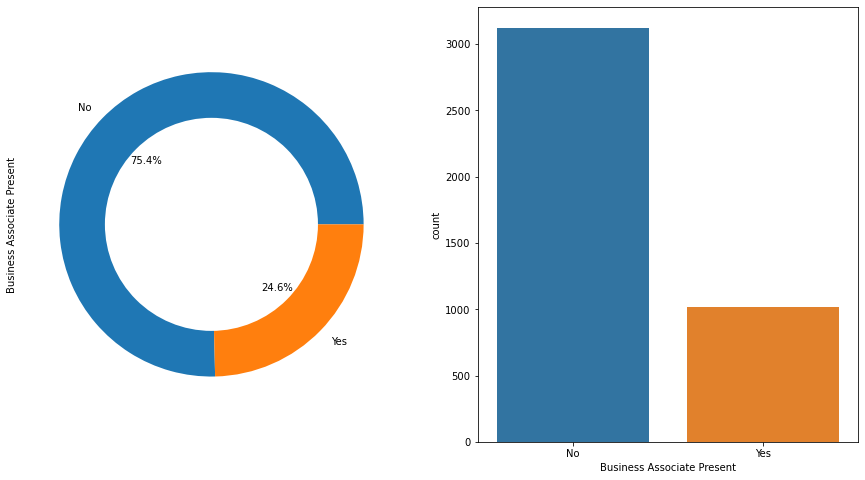

In [12]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Business Associate Present'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Business Associate Present',data=df)
df['Business Associate Present'].value_counts()

## Multivariate Analysis

<AxesSubplot:xlabel='Type of Breach', ylabel='Location of Breached Information'>

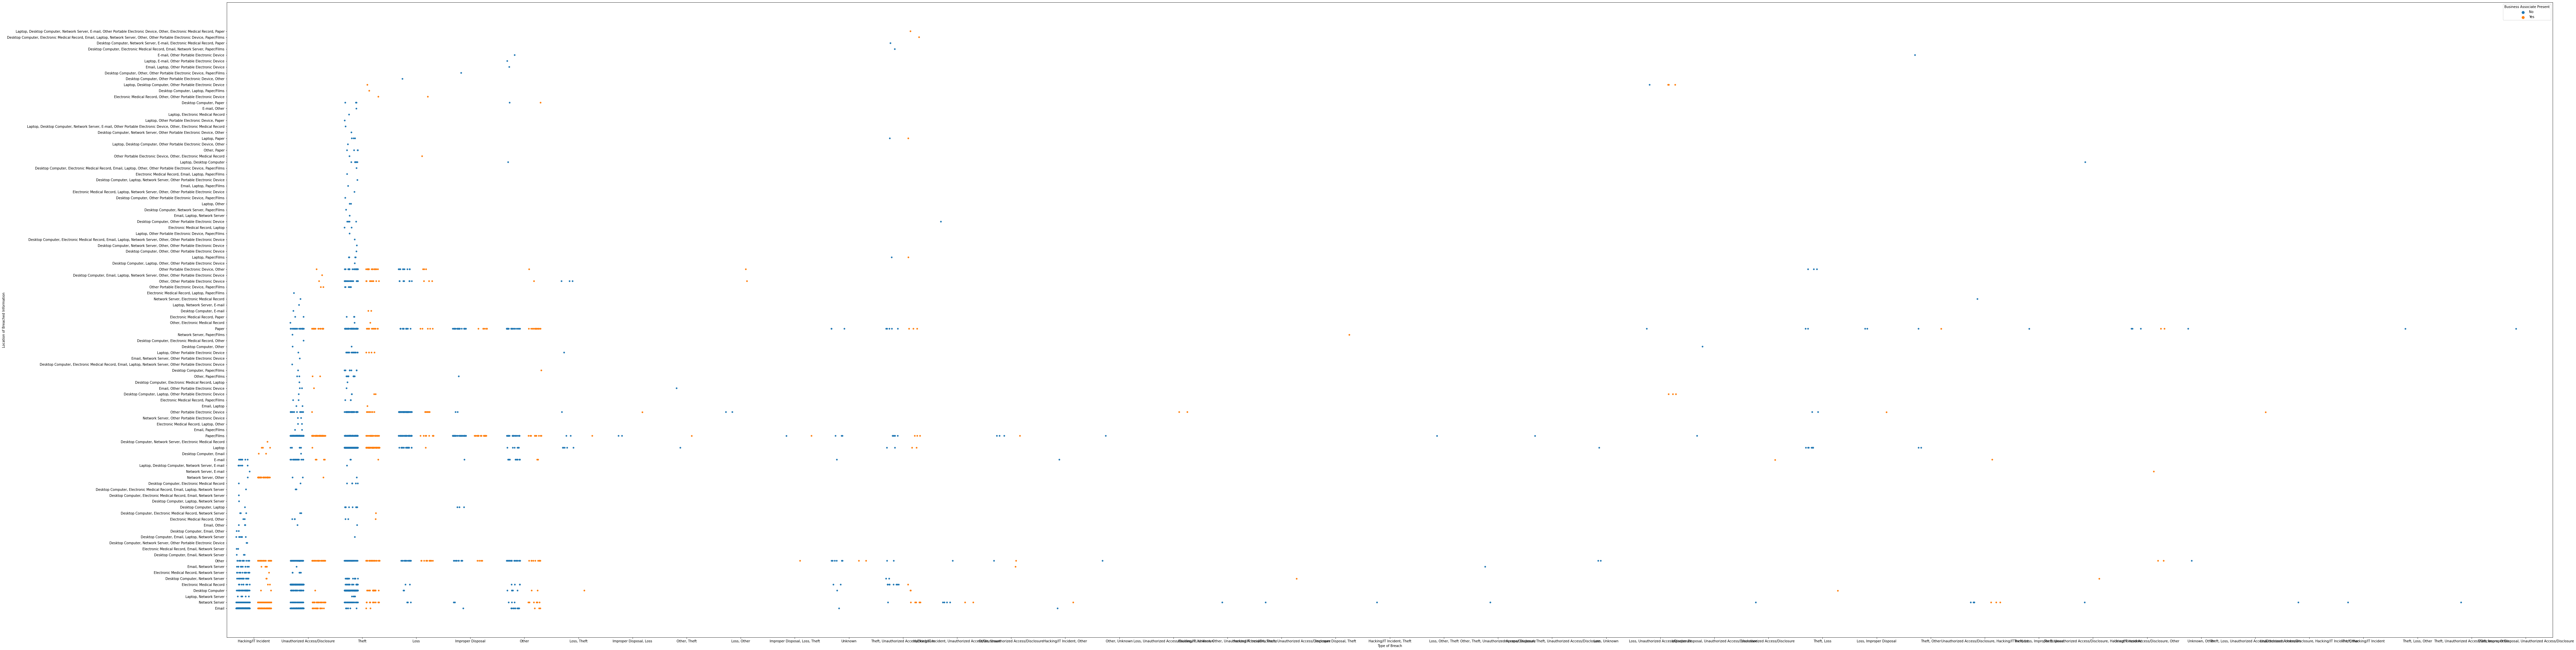

In [15]:
plt.figure(figsize=(125, 35))
sns.stripplot(x='Type of Breach', y='Location of Breached Information', hue='Business Associate Present', jitter=0.25, data=df, dodge=True)